Task5 内容：使用网格搜索法对5个模型进行调优（调参时采用五折交叉验证的方式），并进行模型评估，记得展示代码的运行结果。 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl
from sklearn.model_selection import train_test_split

In [2]:
#正常显示中文
mpl.rcParams['font.sans-serif']=[u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
#用于抑制第三方警告
warnings.filterwarnings("ignore")

In [3]:
pd.options.display.max_rows = 10   #最大显示10行
data = pd.read_csv(r"D:\datasets\data.csv",encoding = "gbk")  #读取数据  
data_1 = data.copy()
data_1.describe()

,Unnamed: 0,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
count,4754.000000,4.754000e+03,4752.000000,4752.000000,4754.000000,4751.000000,4752.000000,4752.000000,4752.000000,4746.000000,...,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4450.000000,4457.000000
mean,6008.414178,1.690993e+06,0.021806,0.901294,1940.197728,14.160674,0.804411,0.365425,17.502946,29.029920,...,3390.038142,1820.357864,9187.009199,76.042630,4.732331,5.227507,16153.690823,8007.696881,24.112809,55.181512
std,3452.071428,1.034235e+06,0.041527,0.144856,3923.971494,694.180473,0.196920,0.170196,4.475616,22.722432,...,1474.206546,583.418291,7371.257043,14.536819,2.974596,3.409292,14301.037628,5679.418585,37.725724,53.486408
min,5.000000,1.140000e+02,0.000000,0.000000,0.000000,0.000000,0.120000,0.033000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000
25%,3106.000000,7.593358e+05,0.010000,0.880000,0.000000,0.615000,0.670000,0.233000,15.000000,16.000000,...,2300.000000,1535.000000,4800.000000,77.000000,2.000000,3.000000,7800.000000,4737.000000,5.000000,10.000000
50%,6006.500000,1.634942e+06,0.010000,0.960000,500.000000,0.970000,0.860000,0.350000,17.000000,23.000000,...,3100.000000,1810.000000,7700.000000,79.000000,4.000000,5.000000,13800.000000,7050.000000,14.000000,36.000000
75%,8999.000000,2.597905e+06,0.020000,0.990000,2000.000000,1.600000,1.000000,0.480000,20.000000,32.000000,...,4300.000000,2100.000000,11700.000000,80.000000,7.000000,7.000000,20400.000000,10000.000000,24.000000,91.000000
max,11992.000000,4.004694e+06,1.000000,1.000000,68000.000000,47596.740000,1.000000,0.941000,42.000000,285.000000,...,10000.000000,6900.000000,87100.000000,87.000000,18.000000,20.000000,266400.000000,82800.000000,360.000000,323.000000


In [4]:
#将空值替换为np.nan
for columns in data_1.columns:
    data_1.loc[data_1[columns] == "NA",columns] = np.nan 
    
#删除无效特征
Irrelevant_features = ['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no', 'source', 'id_name', 'latest_query_time','loans_latest_time']
data_2 = data_1.drop(Irrelevant_features,axis = 1)


#根据reg_preference_for_trad删除空值
data_3 = data_2.dropna(subset = ["reg_preference_for_trad"])
data_3 = data_2.dropna(subset = ["status"])

#在指定阈值的前提下对特征进行删除 
data_3 = data_3.dropna(axis = 1,thresh = 1000)
data_3 = data_3.dropna(axis = 0,thresh = 75)

#对空值采用均值进行填充
data_3 = data_3.fillna(data_3.mean())
print(data_3.shape)

(4423, 82)


In [5]:
#去除标签
data_non_labels = data_3.drop("status",axis = 1)

#采样标签
data_labels = data_3["status"]

#切分数据集
X_train_set,X_test_set,y_train_set,y_test_set = train_test_split(data_non_labels,data_labels,test_size = 0.3,random_state = 2018)
print(X_train_set.shape)

#取reg_preference_for_trad
reg_preference_for_trad = X_train_set["reg_preference_for_trad"].copy()
print(reg_preference_for_trad.shape)

#去除reg_preference_for_trad
data_non_reg_preference = X_train_set.drop("reg_preference_for_trad",axis = 1)
print(data_non_reg_preference.shape)

(3096, 81)
(3096,)
(3096, 80)
(3096, 80)


In [39]:
from sklearn.feature_selection import VarianceThreshold
threshold = 10
vt = VarianceThreshold(threshold = threshold)
data_non_reg_preference = vt.fit_transform(data_non_reg_preference)
data_non_reg_preference.shape

(3096, 43)

In [40]:
#对数据进行归一化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_non_reg_preference_scalered = scaler.fit_transform(data_non_reg_preference)
print(data_non_reg_preference_scalered.shape)

(3096, 43)


In [41]:
#尝试着将城市信息转变为onehot矩阵  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = LabelEncoder().fit_transform(reg_preference_for_trad)
reg_preference_encodered =  OneHotEncoder().fit_transform(encoder.reshape(-1,1)).toarray()
print(reg_preference_encodered.shape)

#将reg_preference_for_trad再添加进去
data_prepared = np.hstack((data_non_reg_preference_scalered,reg_preference_encodered))
print(data_prepared.shape)

(3096, 5)
(3096, 48)


In [22]:
def plot_precision_recall_threshold(precisions,recalls,threshold):
    plt.plot(threshold,precisions[:-1],"b-",label = "Precision")
    plt.plot(threshold,recalls[:-1],"g--",label = "recall")
    plt.xlabel("threshold")
    plt.ylabel("Precisions-Recall")
    plt.ylim([0,1])
    plt.legend(loc = "best")
    plt.show()
    
def plot_precision_recall_curve(precisions,recalls):
    plt.plot(recalls,precisions,"b-",label = "precision-recall")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc = "best")
    plt.show()
    
def plot_fpr_tpr_curve(fpr,tpr,label = None):
    plt.plot(fpr,tpr,linewidth = 2,label = label)
    plt.axis([0,1,0,1])
    plt.plot([0,1],[0,1],"k--")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.show()

In [33]:
data_labels = y_train_set

print(data_prepared.shape)
print(data_labels.shape)

(3096, 56)
(3096,)


0.2099483204134367
4折交叉验证误差:  [-0.21705426 -0.21317829 -0.21447028 -0.21834625]
4折交叉验证准确率:  [0.78294574 0.78682171 0.78552972 0.78165375]
Precision score:  0.6838709677419355
Recall score:  0.2774869109947644
F1 score:  0.39478584729981375
Acc:  0.7900516795865633
(3093,)
(3093,)
(3092,)

Drawing precisions-recalls graphics


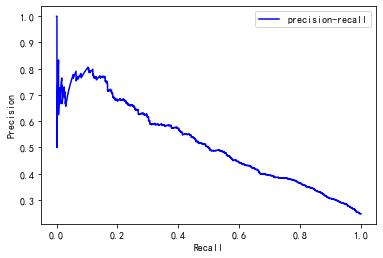

Drawing precisions-recalls-threshold graphics


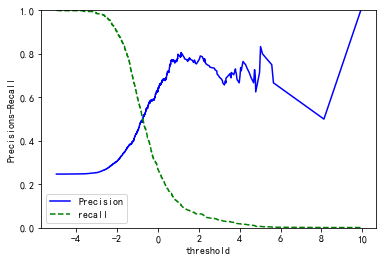

Drawing fpr-tpr graphics


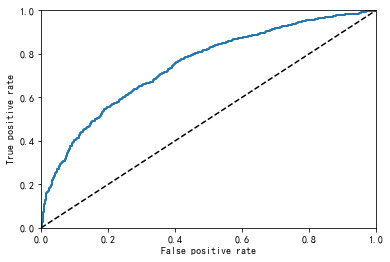

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error  #采用均方误差进行评价

log_reg = LogisticRegression()
log_reg.fit(data_prepared,data_labels)
log_predictions = log_reg.predict(data_prepared)
log_mse = mean_squared_error(data_labels,log_predictions)
print(log_mse)

#4折交叉验证
scores = cross_val_score(log_reg,data_prepared,data_labels,scoring = "neg_mean_squared_error",cv = 4)
print("4折交叉验证误差: ",scores)

#4折交叉验证
scores_1 = cross_val_score(log_reg,data_prepared,data_labels,scoring = "accuracy",cv = 4)
print("4折交叉验证准确率: ",scores_1)

#精确率
log_predictions_all = log_reg.predict(data_prepared)

print("Precision score: ",precision_score(data_labels,log_predictions_all))

#召回率
print("Recall score: ",recall_score(data_labels,log_predictions_all))

#f1值
print("F1 score: ",f1_score(data_labels,log_predictions_all))

#Acc
print("Acc: ",accuracy_score(data_labels,log_predictions_all))
#画出P-R曲线
log_scores = cross_val_predict(log_reg,data_prepared,data_labels,cv = 3,method = "decision_function")
precisions_log,recalls_log, thresholds_log = precision_recall_curve(data_labels,log_scores)
print(precisions_log.shape)
print(recalls_log.shape)
print(thresholds_log.shape)

#画fpr，tpr曲线
fpr_log,tpr_log,thresholds_log_roc = roc_curve(data_labels,log_scores)

print()

print("Drawing precisions-recalls graphics")

plot_precision_recall_curve(precisions_log,recalls_log)

print("Drawing precisions-recalls-threshold graphics")
plot_precision_recall_threshold(precisions_log,recalls_log,thresholds_log)

print("Drawing fpr-tpr graphics")
plot_fpr_tpr_curve(fpr_log,tpr_log)

In [60]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C":[1,2,4,6,8],"fit_intercept":[True,False],"class_weight":["balanced"],
             "n_jobs":[-1],"solver":["newton-cg","lbfgs","sag"],"random_state":[2018]}
grid_search= GridSearchCV(log_reg,param_grid,cv=5,scoring = "precision")
grid_search.fit(data_prepared,data_labels)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 2, 4, 6, 8], 'class_weight': ['balanced'],
                         'fit_intercept': [True, False], 'n_jobs': [-1],
                         'random_state': [2018],
                         'solver': ['newton-cg', 'lbfgs', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
 

In [64]:
grid_search.best_estimator_
print(grid_search.best_params_)

{'C': 4, 'class_weight': 'balanced', 'fit_intercept': True, 'n_jobs': -1, 'random_state': 2018, 'solver': 'sag'}


In [62]:
best_log = LogisticRegression(C=4, class_weight='balanced', dual=False, fit_intercept=True,intercept_scaling=1,
                              l1_ratio=None, max_iter=100,multi_class='warn', n_jobs=-1, penalty='l2',
                              random_state=2018, solver='sag', tol=0.0001, verbose=0,warm_start=False)
best_log.fit(data_prepared,data_labels)
prediction_best_log = best_log.predict(data_prepared)

#4折交叉验证
scores = cross_val_score(best_log,data_prepared,data_labels,scoring = "neg_mean_squared_error",cv = 4)
print("4折交叉验证误差: ",scores)

#4折交叉验证
scores_1 = cross_val_score(best_log,data_prepared,data_labels,scoring = "accuracy",cv = 4)
print("4折交叉验证准确率: ",scores_1)

#精确率
print("Precision score: ",precision_score(data_labels,prediction_best_log))

#召回率
print("Recall score: ",recall_score(data_labels,prediction_best_log))

#f1值
print("F1 score: ",f1_score(data_labels,prediction_best_log))

#Acc
print("Acc: ",accuracy_score(data_labels,prediction_best_log))

4折交叉验证误差:  [-0.30361757 -0.31524548 -0.28165375 -0.27390181]
4折交叉验证准确率:  [0.69638243 0.68475452 0.71834625 0.72609819]
Precision score:  0.45840867992766726
Recall score:  0.6636125654450262
F1 score:  0.5422459893048129
Acc:  0.7235142118863049


In [91]:
#决策树过拟合  
from sklearn.tree import DecisionTreeClassifier
tree_reg = DecisionTreeClassifier()

param_grid = {"criterion":["gini","entropy"],"max_depth":[3,5,7,9,11,13,15,20,25],"min_samples_split":[2,5,8,11,14],
              "random_state":[2018],"class_weight":["balanced"],"max_leaf_nodes":[2,4,8,10,12,14,16,18,20,22,24,26,28],"max_features":[2,4,6,8,10]}

tree_grid_search= GridSearchCV(tree_reg,param_grid = param_grid,cv=5,scoring = "roc_auc")
tree_grid_search.fit(data_prepared,data_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                      

In [92]:
tree_grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 8,
 'max_leaf_nodes': 22,
 'min_samples_split': 14,
 'random_state': 2018}

In [93]:
tree_grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features=8, max_leaf_nodes=22,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=14,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2018, splitter='best')

In [94]:
best_params_tree = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',max_depth=5, max_features=8,
                                          max_leaf_nodes=22,min_impurity_decrease=0.0, min_impurity_split=None,
                                          min_samples_leaf=1, min_samples_split=14,min_weight_fraction_leaf=0.0,
                                          presort=False,random_state=2018, splitter='best')
best_params_tree.fit(data_prepared,data_labels)
tree_predictions = best_params_tree.predict(data_prepared)

#精确率
print("Precision score: ",precision_score(data_labels,tree_predictions))

#召回率
print("Recall score: ",recall_score(data_labels,tree_predictions))

#f1值
print("F1 score: ",f1_score(data_labels,tree_predictions))

#ACC
print("Accuracy:",accuracy_score(data_labels,tree_predictions))

Precision score:  0.421608448415922
Recall score:  0.6793193717277487
F1 score:  0.5203007518796993
Accuracy: 0.6908914728682171


In [99]:
#  随机森林  
from sklearn.ensemble import RandomForestClassifier
forest_reg = RandomForestClassifier()


param_grid = {"criterion":["gini","entropy"],"n_estimators":[3,10,15,20,25,30],"max_depth":[3,5,7,9,11,13,15,20,25],
              "random_state":[2018],"max_leaf_nodes":[2,4,8,10,12,14,16,18,20,22,24,26,28],"max_features":[2,4,6,8,10,12]}

random_tree_grid_search= GridSearchCV(forest_reg,param_grid = param_grid,cv=5,scoring = "roc_auc")
random_tree_grid_search.fit(data_prepared,data_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy

In [101]:
random_tree_grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=11, max_features=12, max_leaf_nodes=28,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=2018,
                       verbose=0, warm_start=False)

In [100]:
random_tree_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 12,
 'max_leaf_nodes': 28,
 'n_estimators': 20,
 'random_state': 2018}

In [103]:
best_random_tree = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',max_depth=11, max_features=12, 
                                          max_leaf_nodes=28,min_impurity_decrease=0.0, min_impurity_split=None,
                                          min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=20,
                                          n_jobs=None, oob_score=False, random_state=2018,verbose=0, warm_start=False)
best_random_tree.fit(data_prepared,data_labels)

best_random_tree_predictions = best_random_tree.predict(data_prepared)
#精确率
print("Precision score: ",precision_score(data_labels,best_random_tree_predictions))

#召回率
print("Recall score: ",recall_score(data_labels,best_random_tree_predictions))

#f1值
print("F1 score: ",f1_score(data_labels,best_random_tree_predictions))

#ACC
print("Accuracy:",accuracy_score(data_labels,best_random_tree_predictions))

Precision score:  0.8678571428571429
Recall score:  0.3180628272251309
F1 score:  0.46551724137931033
Accuracy: 0.8197674418604651


In [109]:
#应用SVC
from sklearn.svm import SVC
svc_reg = SVC()

param_grid = {"C":[0.5,1,2,3],"kernel":["linear","poly","rbf","sigmoid"],"degree":[3,4,5,6],"gamma":np.linspace(0.1,10,10)}

linearsvc_grid_search= GridSearchCV(svc_reg,param_grid = param_grid,cv=5,scoring = "roc_auc")
linearsvc_grid_search.fit(data_prepared,data_labels) 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.5, 1, 2, 3], 'degree': [3, 4, 5, 6],
                         'gamma': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [111]:
linearsvc_grid_search.best_estimator_

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [113]:
linearsvc_grid_search.best_params_

{'C': 3, 'degree': 3, 'gamma': 0.0, 'kernel': 'linear'}

In [115]:
#精确率
from sklearn.svm import SVC
svc = SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr',
          degree=3, gamma="auto", kernel='linear',max_iter=-1, probability=False, random_state=None, 
          shrinking=True,tol=0.001, verbose=False)
svc.fit(data_prepared,data_labels)

svc_predictions_all = svc.predict(data_prepared)

print("Precision score: ",precision_score(data_labels,svc_predictions_all))

#召回率
print("Recall score: ",recall_score(data_labels,svc_predictions_all))

#f1值
print("F1 score: ",f1_score(data_labels,svc_predictions_all))

#ACC
print("Accuracy:",accuracy_score(data_labels,svc_predictions_all))

Precision score:  0.7741935483870968
Recall score:  0.15706806282722513
F1 score:  0.2611534276387377
Accuracy: 0.7806847545219638


In [119]:
from xgboost import XGBClassifier

xgb = XGBClassifier(nthread = -1)
param_grid = {"n_estimatores":[5,7,9,11,13],"max_depth":[4,6,8,10,12],"min_child_weight":[0.6,1,2]}

xgd_grid_search= GridSearchCV(xgb,param_grid = param_grid,cv=5,scoring = "recall")
xgd_grid_search.fit(data_prepared,data_labels) 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=-1, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'min_child_weight': [0.6, 1, 2],
                         'n_estimatores': [5, 7, 9, 11

In [120]:
xgd_grid_search.best_params_

{'max_depth': 4, 'min_child_weight': 2, 'n_estimatores': 5}

In [121]:
xgd_grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing=None, n_estimatores=5,
              n_estimators=100, n_jobs=1, nthread=-1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [123]:
best_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bynode=1, 
                         colsample_bytree=1, gamma=0,learning_rate=0.1, max_delta_step=0, max_depth=4,
                         min_child_weight=2, missing=None, n_estimatores=5,n_estimators=100, n_jobs=1,
                         nthread=-1,objective='binary:logistic', random_state=0, reg_alpha=0,reg_lambda=1, 
                         scale_pos_weight=1, seed=None, silent=None,subsample=1, verbosity=1)

best_xgb.fit(data_prepared,data_labels)

#精确率
xgb_predictions_all = xgb.predict(data_prepared)

print("Precision score: ",precision_score(data_labels,xgb_predictions))

#召回率
print("Recall score: ",recall_score(data_labels,xgb_predictions))

#f1值
print("F1 score: ",f1_score(data_labels,xgb_predictions))

XGBoostError: need to call fit or load_model beforehand